In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys


import legendre

In [2]:
N = 100
tmax=10
dt = tmax/N

lam = np.logspace(start=-8, stop=2, base=10, num=20)

S_norm_OM  = []
S_norm_MSR = []

for l in lam:
    t = legendre.transform_nomemory(lambda_=l, a=10, D=1, N=N, noise="d", pot="m", tmax=tmax)
    S_G = 2 * (t.Pot_mexico(0) - t.Pot_mexico(-1)) / (1 + l * 10 ** 2)

    #op = t.minimize_full()
    res = t.minimize()
    #S_norm_OM.append(op.fun/S_G)
    S_norm_MSR.append(res.fun/S_G)

KeyboardInterrupt: 

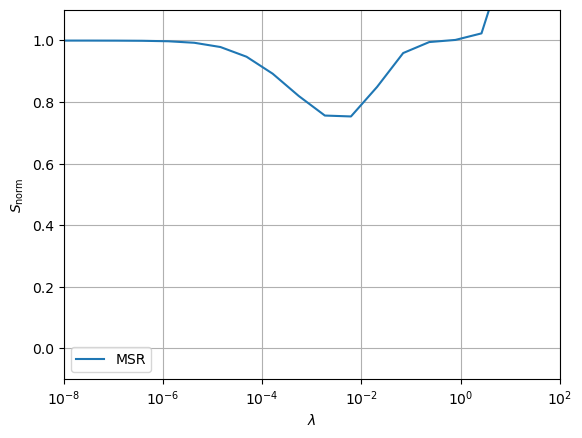

In [ ]:
fig3 = plt.figure()
#plt.plot(lam, S_norm_OM, label="OM")
plt.plot(lam, S_norm_MSR, label="MSR")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$S_\mathrm{norm}$")
plt.xscale("log")
plt.grid()
plt.legend()
plt.axis([min(lam), max(lam), -0.1, 1.1])
plt.savefig("S_norm.pdf", dpi=500, bbox_inches="tight")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys


import legendre


N = 100
tmax = 10
dt = tmax/N


t = legendre.transform_nomemory(lambda_=0, a=10, D=1, N=N, noise="d", pot="m", tmax=tmax)
res = t.minimize()



system = legendre.transform(lambda_=0, a=10, tau=0, D1=0, D2=1, N=N, noise="d", pot="m", tmax=10, sigma=1, b=1)
result = system.minimize(in_cond=res.x, a=-1e-6)

system2 = legendre.transform(lambda_=0, a=10, tau=1, D1=0, D2=1, N=N, noise="d", pot="m", tmax=10, sigma=1, b=1)
result2 = system2.minimize(in_cond=res.x, a=1e-6)


time = np.linspace(0, 10, 100)

fig2, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
ax[0].plot(time, res.x[:N], label=r"AP, $\lambda=0$")
ax[0].plot(time, result.x[:N], label=r"MEM, $\lambda=0, \tau=0$")
ax[0].plot(time, result2.x[:N], label=r"MEM, $\lambda=0, \tau=10^{-2}$")
ax[0].set_xlabel(r"$t$")
ax[0].set_ylabel(r"$q$")
ax[0].set_title("Comparison of minimizations")
ax[0].legend()
ax[0].grid()

ax[1].plot(res.x[:N-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\lambda=0$")
ax[1].plot(result.x[:N-1], (result.x[1:N] - result.x[:N-1])/dt, label=r"MSR Legendre minimization, $\lambda=0, \tau=0$")
ax[1].plot(result2.x[:N-1], (result2.x[1:N] - result2.x[:N-1])/dt, label=r"MSR Legendre minimization, $\lambda=0, \tau=10^{-2}$")
ax[1].set_ylabel(r"$\frac{q(t+dt)-q(t)}{dt}$")
ax[1].set_xlabel(r"$q$")
ax[1].set_title("Comparison of minimizations")
#ax[1].legend()
ax[1].grid()